In [122]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import matplotlib.image as mpimg
%matplotlib inline

In [123]:
def loadfile():
    f1 = mpimg.imread('image1.png')
    f2 = mpimg.imread('image2.png')
    
    print("image1:")
    plt.imshow(f1)
    plt.axis('off')
    plt.show()
    
    print("image2:")
    plt.imshow(f2)
    plt.axis('off')
    plt.show()
    
    a = np.reshape(f1,(1,512*512))
    b = np.reshape(f2,(1,512*512))
    c = np.append(a, b, axis=0)
    return c

In [124]:
def white(x):
    s = np.shape(x)
    mean = x.mean(axis=-1)
    for i in range(s[0]):
        for j in range(s[1]):
            x[i][j] = x[i][j] - mean[i]
    sig = np.dot(x, x.T)
    D,E = np.linalg.eig(sig)
    n = np.shape(D)
    for i in range(s[0]):
        D[i] = math.sqrt(D[i])
    d = np.diag(1/D)
    V = np.dot(d, E.T)
    z = np.dot(V, x)
    return z

image1:


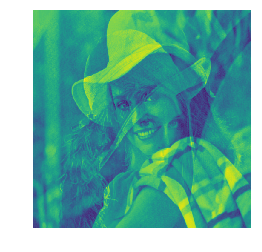

image2:


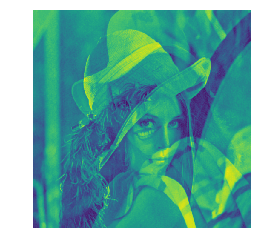

In [125]:
x = loadfile()
z = white(x)

In [112]:
def Decorrelation(W):
    D, E = np.linalg.eigh(np.dot(W, W.T))
    return np.dot(np.dot(E * (1. / np.sqrt(D)), E.T), W)

In [113]:
##何度か実行してからWの適切な初期値を得ました
import random
def gradient(z):
    s = np.shape(z)
    m = s[0]
    W = np.random.rand(m, m)
    W[0][0] = 0.24716752
    W[0][1] = 0.74311758
    W[1][0] = 0.03877343
    W[1][1] = 0.65246451
    print("ランダムに生成するWは以下です：")
    print(W)
    lim = 200
    for j in range(200):
        W1 = W
        W = W/np.linalg.norm(W)
        y = np.dot(W.T,z)
        W = (z * pow(y,3)).mean(axis=-1) - 3*W
        W = W/np.linalg.norm(W)
        W = Decorrelation(W)
        lim = max( abs(abs(np.diag(np.dot(W, W1.T))) - 1))
        if lim < 0.0000000001:
            break
            
    return W

In [114]:
W = gradient(z)
print("収束して得たWは以下です：")
print(W)

ランダムに生成するWは以下です：
[[ 0.24716752  0.74311758]
 [ 0.03877343  0.65246451]]
収束して得たWは以下です：
[[ 0.78738422  0.61646256]
 [-0.61646256  0.78738422]]


In [115]:
y = np.dot(W,z)

source1:


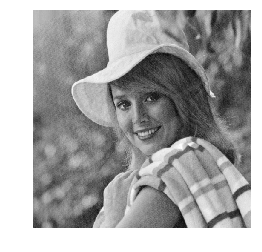

In [126]:
print("source1:")
s1 = np.reshape(y[0],(512, 512))
plt.imshow(s1, plt.cm.gray_r)
plt.axis('off')
plt.show()

source2:


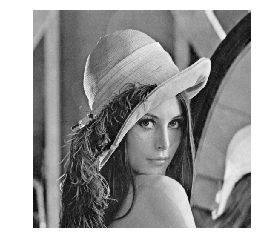

In [127]:
print("source2:")
s2 = np.reshape(y[1],(512, 512))
plt.imshow(s2, plt.cm.gray_r)
plt.axis('off')
plt.show()